**1) Implementing the Neural network from scratch**

In [ ]:
#Building a neural network
#Training the model using the boston data set
#Import the necessary libraries
import numpy as np
import random as random
from sklearn import datasets
import pandas as pd

#defining the activation key
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1.0 - sigmoid(z))


#training the model with parameters
def train(X, y, n_hidden, learning_rate, n_iter):
    m, n_input = X.shape
    #randomly assigned weights and biases
    W1 = np.random.randn(n_input, n_hidden)
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, 1)
    b2 = np.zeros((1, 1))
    for i in range(1, n_iter + 1):
        Z2 = np.matmul(X, W1) + b1
        A2 = sigmoid(Z2)
        Z3 = np.matmul(A2, W2) + b2
        A3 = Z3
        dZ3 = A3 - y
        dW2 = np.matmul(A2.T, dZ3)
        db2 = np.sum(dZ3, axis=0, keepdims=True)
        dZ2 = np.matmul(dZ3, W2.T) * sigmoid_derivative(Z2)
        dW1 = np.matmul(X.T, dZ2)
        db1 = np.sum(dZ2, axis=0)
        W2 = W2 - learning_rate * dW2 / m
        b2 = b2 - learning_rate * db2 / m
        W1 = W1 - learning_rate * dW1 / m
        b1 = b1 - learning_rate * db1 / m
        if i % 100 == 0:
            cost = np.mean((y - A3) ** 2)
            print('iteration %i, training loss %f' %
                  (i, cost))
    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

In [ ]:
#dataset is loaded
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
#with the scaled dataset we are defining the X_test, X_train, y_train, y_test
num_test = 10  # the last 10 samples as testing set
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = boston[:, :-1][:-num_test, :]
X_train = scaler.fit_transform(X_train)
y_train = target[:-num_test].reshape(-1, 1)
X_test = boston[:, :-1][-num_test:, :]
X_test = scaler.transform(X_test)
y_test = target[-num_test:]

In [ ]:
#training one hidden layer with one dataset.
n_hidden = 20
learning_rate = 0.1
n_iter = 2000
model = train(X_train, y_train, n_hidden, learning_rate, n_iter)

iteration 100, training loss 18.071608
iteration 200, training loss 14.217944
iteration 300, training loss 12.580607
iteration 400, training loss 11.479846
iteration 500, training loss 10.627573
iteration 600, training loss 9.939789
iteration 700, training loss 9.378834
iteration 800, training loss 8.903415
iteration 900, training loss 8.480662
iteration 1000, training loss 8.099411
iteration 1100, training loss 7.752708
iteration 1200, training loss 7.450111
iteration 1300, training loss 7.136181
iteration 1400, training loss 6.780490
iteration 1500, training loss 6.579860
iteration 1600, training loss 6.396434
iteration 1700, training loss 6.226977
iteration 1800, training loss 6.070564
iteration 1900, training loss 5.914313
iteration 2000, training loss 5.758366


In [ ]:
#we define prediction model which takes model input to produce the regression results
def predict(x, model):
    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    A2 = sigmoid(np.matmul(x, W1) + b1)
    A3 = np.matmul(A2, W2) + b2
    return A3

In [ ]:
#we apply trained model to test the model
predictions = predict(X_test, model)
print(predictions)
print(y_test)

[[16.9511088 ]
 [19.32031228]
 [22.20059306]
 [18.91502203]
 [20.46553723]
 [29.80617691]
 [22.0284508 ]
 [31.6243103 ]
 [29.020395  ]
 [20.74838031]]
[19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9 22.  11.9]


**2) Implementing neural network with Scikit learn**


In [ ]:
#Neural networks with scikit learn
from sklearn.neural_network import MLPRegressor

# Create an instance of the MLPRegressor class with the desired hyperparameters
nn_scikit = MLPRegressor(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', learning_rate_init=0.001, random_state=42, max_iter=2000)

# Fit the model to the training data
nn_scikit.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = nn_scikit.predict(X_test)

# Print the predictions
print(predictions)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17.35432868 18.38962029 21.50634442 19.22683883 19.72729684 22.71390889
 20.49468318 22.97956332 21.71043007 19.94366541]


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#print the MSE of the prediction
print(np.mean(y_test- predictions)**2)

0.9499776967234388


**3) Implemeting neural network with Tensorflow**

In [ ]:
#import the necessary 
import tensorflow as tf
from tensorflow import keras

#random seed is added as results are reproducible.
tf.random.set_seed(42)

#model is defined
model = keras.Sequential([keras.layers.Dense(units= 20, activation = 'relu'),
                          keras.layers.Dense(units= 8, activation = 'relu'),
                          keras.layers.Dense(units= 1)])

#Compiling the model
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.02))
#train the model
model.fit(X_train, y_train, epochs=300)

Epoch 1/300
16/16 [==============================] - 1s 2ms/step - loss: 475.2203
Epoch 2/300
16/16 [==============================] - 0s 2ms/step - loss: 110.5561
Epoch 3/300
16/16 [==============================] - 0s 2ms/step - loss: 42.1194
Epoch 4/300
16/16 [==============================] - 0s 3ms/step - loss: 29.8767
Epoch 5/300
16/16 [==============================] - 0s 2ms/step - loss: 24.6369
Epoch 6/300
16/16 [==============================] - 0s 2ms/step - loss: 23.6489
Epoch 7/300
16/16 [==============================] - 0s 3ms/step - loss: 20.5556
Epoch 8/300
16/16 [==============================] - 0s 2ms/step - loss: 19.6276
Epoch 9/300
16/16 [==============================] - 0s 2ms/step - loss: 17.8804
Epoch 10/300
16/16 [==============================] - 0s 2ms/step - loss: 17.1301
Epoch 11/300
16/16 [==============================] - 0s 2ms/step - loss: 16.9353
Epoch 12/300
16/16 [==============================] - 0s 2ms/step - loss: 16.8396
Epoch 13/300
16/16 [===

In [ ]:
#printing the predictions
predictions = model.predict(X_test)[:, 0]
print(predictions)

#printing the loss function
print(np.mean((y_test- predictions))**2)

1/1 [==============================] - 0s 92ms/step
[20.439594 21.477303 23.614979 22.104256 21.855715 24.898129 26.357567
 21.142498 21.048439 25.026201]
11.333106605167044


**5) Preventing overfitting in the neural network**

In [ ]:
#preventing the overfitting
model = keras.Sequential([
    keras.layers.Dense(units=32, activation ='relu'), tf.keras.layers.Dropout(0.5), keras.layers.Dense(units=1)
])

**Predicting the stock prices of dow jones**

In [ ]:
#predicting the stock prices with neural network
import pandas as pd
mydata = pd.read_csv('/content/20051201-20051210.csv', index_col = 'Date')
mydata 

,Open,High,Low,Close,Volume
Date,,,,,
2005-12-01,10806.0,10934.9,10806.0,10912.6,256932865
2005-12-02,10912.0,10921.4,10861.7,10877.5,214888854
2005-12-05,10877.0,10877.0,10810.7,10835.0,237430947
2005-12-06,10835.4,10936.2,10835.4,10856.9,264721465
2005-12-07,10856.9,10868.1,10764.0,10810.9,243543206
2005-12-08,10808.4,10847.2,10729.7,10755.1,253313750
2005-12-09,10751.8,10806.0,10729.9,10778.6,238907145


In [ ]:
#implementing feature generation by starting with a sub-function that directly creates features from the original six features
def add_original_feature(df, df_new):
  df_new['open']= df['Open']
  df_new['open_1']= df['Open'].shift(1)
  df_new['close_1']= df['Close'].shift(1)
  df_new['high_1']= df['High'].shift(1)
  df_new['low_1']= df['Low'].shift(1)
  df_new['volume_1']= df['Volume'].shift(1)
#develop a sub-function that generates six features related to average close prices
def add_avg_price(df, df_new):
  df_new['avg_price_5']= df['Close'].rolling(5).mean().shift(1)
  df_new['avg_price_30']= df['Close'].rolling(21).mean().shift(1)
  df_new['avg_price_365']= df['Close'].rolling(252).mean().shift(1)
  df_new['ratio_avg_price_5_30'] = df_new['avg_price_5']/df_new['avg_price_30']
  df_new['ratio_avg_price_5_365'] = df_new['avg_price_5']/df_new['avg_price_365']
  df_new['ratio_avg_price_30_365'] = df_new['avg_price_30']/df_new['avg_price_365']

#a sub-function that generates six features related to average volumes is as follows
def add_avg_volume(df, df_new):
  df_new['avg_volume_5']= df['Volume'].rolling(5).mean().shift(1)
  df_new['avg_volume_30']= df['Volume'].rolling(21).mean().shift(1)
  df_new['avg_volume_365']= df['Volume'].rolling(252).mean().shift(1)
  df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5']/df_new['avg_volume_30']
  df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5']/df_new['avg_volume_365']
  df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30']/df_new['avg_volume_365']

#for the standard deviation, we develop the following sub-function for the price related features
def add_std_price(df, df_new):
  df_new['std_price_5']= df['Close'].rolling(5).std().shift(1)
  df_new['std_price_30']= df['Close'].rolling(21).std().shift(1)
  df_new['std_price_365']= df['Close'].rolling(252).std().shift(1)
  df_new['ratio_std_price_5_30'] = df_new['std_price_5']/df_new['std_price_30']
  df_new['ratio_std_price_5_365'] = df_new['std_price_5']/df_new['std_price_365']
  df_new['ratio_std_price_30_365'] = df_new['std_price_30']/df_new['std_price_365']

#a sub-function that generates six volume-based standard deviation features is as follows.

def add_std_volume(df, df_new):
  df_new['std_volume_5']= df['Volume'].rolling(5).std().shift(1)
  df_new['std_volume_30']= df['Volume'].rolling(21).std().shift(1)
  df_new['std_volume_365']= df['Volume'].rolling(252).std().shift(1)
  df_new['ratio_std_volume_5_30'] = df_new['std_volume_5']/df_new['std_volume_30']
  df_new['ratio_std_volume_5_365'] = df_new['std_volume_5']/df_new['std_volume_365']
  df_new['ratio_std_volume_30_365'] = df_new['std_volume_30']/df_new['std_volume_365']

#Seven return-based features are generated using the following sub-function.

def add_return_feature(df, df_new):
  df_new['return_1']= ((df['Close']- df['Close']).shift(1))/df['Close'].shift(1).shift(1)
  df_new['return_5']= ((df['Close']-df['Close']).shift(5))/df['Close'].shift(5).shift(1)
  df_new['return_30']= ((df['Close']-df['Close']).shift(21))/df['Close'].shift(21).shift(1)
  df_new['return_365']= ((df['Close']-df['Close']).shift(252))/df['Close'].shift(252).shift(1)
  df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
  df_new['moving_avg_30'] = df_new['return_1'].rolling(21).mean().shift(1)
  df_new['moving_avg_365'] = df_new['return_1'].rolling(252).mean().shift(1)

#main feature generation function

def generate_features(df):
  df_new = pd.DataFrame()
  #6 original features
  add_original_feature(df, df_new)
  #31 genrated features
  add_avg_price(df, df_new)
  add_avg_volume(df, df_new)
  add_std_price(df, df_new)
  add_std_volume(df, df_new)
  add_return_feature(df, df_new)
  # the target
  df_new['close'] = df ['Close']
  df_new = df_new.dropna(axis=0)
  return df_new

In [ ]:
#loading the dataset
data_raw = pd.read_csv('/content/19880101-20191231.csv', index_col ='Date')
data = generate_features(data_raw)
print(data.round(decimals=3).head(5))

              open  open_1  close_1  high_1   low_1    volume_1  avg_price_5  \
Date                                                                           
1989-01-04  2146.6  2168.4   2144.6  2168.4  2127.1  17302883.0      2165.00   
1989-01-05  2177.7  2146.6   2177.7  2183.4  2146.6  15714720.0      2168.00   
1989-01-06  2190.5  2177.7   2190.5  2205.2  2173.0  20303094.0      2172.82   
1989-01-09  2194.3  2190.5   2194.3  2213.8  2182.3  16494441.0      2175.14   
1989-01-10  2199.5  2194.3   2199.5  2209.1  2185.0  18410324.0      2181.32   

            avg_price_30  avg_price_365  ratio_avg_price_5_30  ...  \
Date                                                           ...   
1989-01-04      2150.624       2062.113                 1.007  ...   
1989-01-05      2154.690       2062.668                 1.006  ...   
1989-01-06      2157.867       2063.218                 1.007  ...   
1989-01-09      2160.005       2064.341                 1.007  ...   
1989-01-10      216

**Training a simple neural network**

In [ ]:
#Training a simple neural network.
data_raw = pd.read_csv('/content/19880101-20191231.csv', index_col ='Date')
data = generate_features(data_raw)

#We construct the training set using data from 1988 to 2018 and the testing set using data from 2019:
start_train ='1988-01-01'
end_train   = '2018-12-31'
start_test = '2019-01-01'
end_test    =  '2019-12-31'
data_train = data.loc[start_train:end_train]
X_train = data_train.drop('close', axis=1).values
y_train  = data_train['close'].values
data_test = data.loc[start_test:end_test]
X_test = data_test.drop('close', axis=1).values
y_test  = data_test['close'].values


#We need to normalize features into the same or a comparable scale. We do so by removing the mean and rescaling to unit variance:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

#rescaling dataset
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test  = scaler.transform(X_test)

#defining the model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([ 
        Dense(units = 32, activation = 'relu'),
        Dense (units=1)
        ])
#compile the model
model.compile(loss='mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))

#training the model
model.fit(X_scaled_train, y_train, epochs=100, verbose = True)


Epoch 1/100
237/237 [==============================] - 1s 2ms/step - loss: 34137876.0000
Epoch 2/100
237/237 [==============================] - 0s 2ms/step - loss: 1693877.5000
Epoch 3/100
237/237 [==============================] - 0s 2ms/step - loss: 301743.8125
Epoch 4/100
237/237 [==============================] - 0s 2ms/step - loss: 112353.3047
Epoch 5/100
237/237 [==============================] - 0s 2ms/step - loss: 56634.0430
Epoch 6/100
237/237 [==============================] - 0s 2ms/step - loss: 34720.4570
Epoch 7/100
237/237 [==============================] - 0s 2ms/step - loss: 27838.8906
Epoch 8/100
237/237 [==============================] - 0s 2ms/step - loss: 23057.2441
Epoch 9/100
237/237 [==============================] - 0s 2ms/step - loss: 22389.4688
Epoch 10/100
237/237 [==============================] - 0s 2ms/step - loss: 23434.8633
Epoch 11/100
237/237 [==============================] - 0s 2ms/step - loss: 26015.3184
Epoch 12/100
237/237 [=======================

In [ ]:
#displaying metrics for testing the effectiveness of the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = model.predict(X_scaled_test)
print(f'Mse : {mean_squared_error(y_test, predictions):.3f}')
print(f'MAE : {mean_absolute_error(y_test, predictions):.3f}')
print(f'R^2 : {r2_score(y_test, predictions):.3f}')

8/8 [==============================] - 0s 2ms/step
Mse : 238278.926
MAE : 451.510
R^2 : 0.795


**Fine tuning the neural network**

In [ ]:
#fine tuning the network
from tensorboard.plugins.hparams.summary_v2 import hparams
from tensorboard.plugins.hparams import api as hp
import tensorflow as tf
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

tf.random.set_seed(42)

# Define the hyperparameters and their values
HP_HIDDEN = hp.HParam('hidden_size', hp.Discrete([64, 32, 16]))
HP_EPOCHS = hp.HParam('epochs', hp.Discrete([300, 1000]))
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.RealInterval(0.01, 0.4))

# Define a function to train and test the model with the given hyperparameters and log the results to TensorBoard
def train_test_model(hparams, logdir):
    # Define the model architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=hparams[HP_HIDDEN], activation='relu'),
        tf.keras.layers.Dense(units=1)
    ])
    # Compile the model
    model.compile(
        loss='mean_squared_error',
        optimizer=tf.keras.optimizers.Adam(hparams[HP_LEARNING_RATE]),
        metrics=['mean_squared_error']
    )
    # Fit the model to the training data and evaluate on the test data
    model.fit(
        X_scaled_train, y_train,
        validation_data=(X_scaled_test, y_test),
        epochs=hparams[HP_EPOCHS],
        verbose=False,
        callbacks=[
            tf.keras.callbacks.TensorBoard(logdir),
            hp.KerasCallback(logdir, hparams),
            tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=200, verbose=0, mode='auto')
        ]
    )
    _, mse = model.evaluate(X_scaled_test, y_test)
    pred = model.predict(X_scaled_test)
    r2 = r2_score(y_test, pred)
    return mse, r2

# Define a function to run the training and testing for all combinations of hyperparameters and log the results to TensorBoard
def run(logdir, hparams):
    with tf.summary.create_file_writer(logdir).as_default():
        hp.hparams(hparams)
        mse, r2 = train_test_model(hparams, logdir)
        tf.summary.scalar('mean_squared_error', mse, step=1)
        tf.summary.scalar('r2', r2, step=1)

# Define the range of hyperparameters to search over
session_num = 0
for hidden_size in HP_HIDDEN.domain.values:
    for epochs in HP_EPOCHS.domain.values:
        for learning_rate in tf.linspace(HP_LEARNING_RATE.domain.min_value, HP_LEARNING_RATE.domain.max_value, 5):
            hparams = {
                HP_HIDDEN: hidden_size,
                HP_EPOCHS: epochs,
                HP_LEARNING_RATE: float("%.2f" % float(learning_rate))
            }
            run_name = "run-%d" % session_num
            print('Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            run('logs/hparams_tuning/' + run_name, hparams)
            session_num += 1





Starting trial: run-0
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.01}
8/8 [==============================] - 0s 2ms/step
Starting trial: run-1
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.11}
8/8 [==============================] - 0s 3ms/step
Starting trial: run-2
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.21}
8/8 [==============================] - 0s 2ms/step
Starting trial: run-3
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.3}
8/8 [==============================] - 0s 2ms/step
Starting trial: run-4
{'hidden_size': 16, 'epochs': 300, 'learning_rate': 0.4}
8/8 [==============================] - 0s 2ms/step
Starting trial: run-5
{'hidden_size': 16, 'epochs': 1000, 'learning_rate': 0.01}
8/8 [==============================] - 0s 3ms/step
Starting trial: run-6
{'hidden_size': 16, 'epochs': 1000, 'learning_rate': 0.11}
8/8 [==============================] - 0s 2ms/step
Starting trial: run-7
{'hidden_size': 16, 'epochs': 1000, 'learning_rate': 0.21}
8/

Here, we found out the optimal combination of hidden_size = 16, epochs = 1000, learning rate = 0.21 is the best performing parameters which achieve the r2 score has 0.971

In [ ]:
#we use the optimal model to make predictions:
model=Sequential([Dense(units=16, activation='relu'), Dense(units=1)])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.21))
model.fit(X_scaled_train, y_train, epochs=1000, verbose=False)
predictions_4= model.predict(X_scaled_test)[:,0]

8/8 [==============================] - 0s 2ms/step


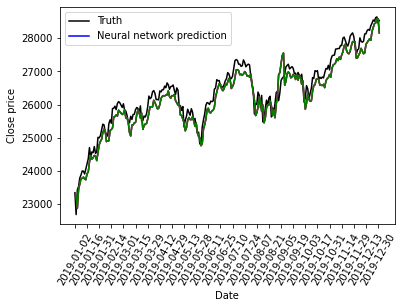

In [ ]:
#Plot the prediction along with the ground truth as follows:
import matplotlib.pyplot as plt
plt.plot(data_test.index, y_test, c='k')
plt.plot(data_test.index,predictions_4,c='b')
plt.plot(data_test.index,predictions_4,c='r')
plt.plot(data_test.index,predictions_4,c='g')
plt.xticks(range(0,252,10), rotation=60)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(['Truth', 'Neural network prediction'])
plt.show()